In [19]:
s3_data ="s3://aegovan-data/processed_dataset/test_unique_pub_v6_max_neg.json"
data_dir = "temp"

In [3]:
# !rm -rf $data_dir
# !mkdir $data_dir
# !aws s3 cp s3://aegovan-data/results/ppi-bert-extractor-neg-2019-10-28-08-30-00-601/output/output.tar.gz $data_dir

download: s3://aegovan-data/results/ppi-bert-extractor-neg-2019-10-28-08-30-00-601/output/output.tar.gz to temp/output.tar.gz


In [11]:
#!tar -xf $data_dir/output.tar.gz -C $data_dir


In [15]:
# !rm $data_dir/output.tar.gz
# !rm $data_dir/best_snaphsotmodel.pt

rm: temp/best_snaphsotmodel.pt: No such file or directory


In [18]:
!ls -l $data_dir

total 9168
-rw-r--r--  1 aeg  ANT\Domain Users  4684129 Oct 28 22:01 predicted.json
-rw-r--r--  1 aeg  ANT\Domain Users     2132 Oct 28 22:00 training_scores_epoch_Objectdump_20191028_110040_328b2c4b-7aa4-4484-acab-0849d05ab48d.json
-rw-r--r--  1 aeg  ANT\Domain Users     2102 Oct 28 22:00 validation_scores_epoch_Objectdump_20191028_110040_8c9aab5c-807e-4f27-8bbf-4fe0bc26761c.json


In [138]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

In [139]:
import boto3

def download_single_file(bucket_name_path, local_path):
    index = bucket_name_path.find("://")

    # remove the s3:// if present
    if index > -1:
        bucket_name_path = bucket_name_path[index + 3:]

    key_start_index = bucket_name_path.find("/")
    bucket_name = bucket_name_path
    key = "/"
    if key_start_index > -1:
        bucket_name = bucket_name_path[0:key_start_index]
        key = bucket_name_path[key_start_index + 1:]
        
    client = boto3.resource('s3')
    client.Bucket(bucket_name).download_file(key, local_path)



In [23]:
import glob, os

test_input_file = os.path.join(data_dir, "test.json")
results_file = os.path.join(data_dir, "predicted.json")
validation_fit_file = glob.glob("{}/validation_scores_epoch_Objectdump*.json".format(data_dir))[0]
train_fit_file = glob.glob("{}/training_scores_epoch_Objectdump*.json".format(data_dir))[0]


pos_label = True

In [141]:
#download_single_file(s3_data, test_input_file)

In [22]:
import pandas as pd

In [64]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [24]:
df_results = pd.read_json(results_file)
df_results["actual"] = df_results["isValid"]

In [25]:
df_results.columns


Index(['entityMentionsCount', 'hasTriggerWord', 'interactionId',
       'interactionType', 'isValid', 'lessThanThreshold', 'participant1Alias',
       'participant1Id', 'participant2Alias', 'participant2Id',
       'participants_count', 'pubmedId', 'pubmedTitle', 'pubmedabstract',
       'normalised_abstract', 'particpant1Exists', 'particpant2Exists',
       'bothParticpantsExist', 'noParticpantsExist', 'predicted',
       'confidence_scores', 'actual'],
      dtype='object')

In [26]:
df_results.shape

(1520, 22)

In [69]:
df_results.query("interactionType=='demethylation' and isValid==True").head(n=2)

,entityMentionsCount,hasTriggerWord,interactionId,interactionType,isValid,lessThanThreshold,participant1Alias,participant1Id,participant2Alias,participant2Id,participants_count,pubmedId,pubmedTitle,pubmedabstract,normalised_abstract,particpant1Exists,particpant2Exists,bothParticpantsExist,noParticpantsExist,predicted,confidence_scores,actual,confidence_true,confidence_false,true,false
1419,7,True,633554,demethylation,True,True,"[[h31_bovin], [Histone H3.1]]",P68432,"[[kdm5c_human], [Lysine-specific demethylase 5C], [KDM5C], [DXS1272E], [SMCX], [XE169], [Jumonji/ARID domain-containing protein 1C], [Protein SmcX], [Protein Xe169], [JARID1C], [Histone demethylase JARID1C]]",P41229,2,17320160,None,"Histone methylation regulates chromatin structure and transcription. The recently identified histone demethylase lysine-specific demethylase 1 (LSD1) is chemically restricted to demethylation of only mono- and di- but not trimethylated histone H3 lysine 4 (H3K4me3). We show that the X-linked mental retardation (XLMR) gene SMCX (JARID1C), which encodes a JmjC-domain protein, reversed H3K4me3 to di- and mono- but not unmethylated products. Other SMCX family members, including SMCY, RBP2, and PLU-1, also demethylated H3K4me3. SMCX bound H3K9me3 via its N-terminal PHD (plant homeodomain) finger, which may help coordinate H3K4 demethylation and H3K9 methylation in transcriptional repression. Significantly, several XLMR-patient point mutations reduced SMCX demethylase activity and binding to H3K9me3 peptides, respectively. Importantly, studies in zebrafish and primary mammalian neurons demonstrated a role for SMCX in neuronal survival and dendritic development and a link to the demethylase activity. Our findings thus identify a family of H3K4me3 demethylases and uncover a critical link between histone modifications and XLMR.","Histone methylation regulates chromatin structure and transcription. The recently identified histone demethylase O60341 (O60341) is chemically restricted to demethylation of only mono- and di- but not trimethylated histone H3 lysine 4 (H3K4me3). We show that the X-linked mental retardation (XLMR) gene P41229 (P41229), which encodes a JmjC-domain protein, reversed H3K4me3 to di- and mono- but not unmethylated products. Other P41229 family members, including Q9BY66, P50120, and Q9UGL1, also demethylated H3K4me3. P41229 bound H3K9me3 via its N-terminal PHD (plant homeodomain) finger, which may help coordinate H3K4 demethylation and H3K9 methylation in transcriptional repression. Significantly, several XLMR-patient point mutations reduced P41229 demethylase activity and binding to H3K9me3 peptides, respectively. Importantly, studies in zebrafish and primary mammalian neurons demonstrated a role for P41229 in neuronal survival and dendritic development and a link to the demethylase activity. Our findings thus identify a family of H3K4me3 demethylases and uncover a critical link between histone modifications and XLMR.",False,True,False,False,True,"{'False': -1.3754841089, 'True': 1.1517086029}",True,3.163594,0.252717,3.163594,0.252717
1420,6,True,633560,demethylation,True,True,"[[h31_bovin], [Histone H3.1]]",P68432,"[[kdm5d_human], [Lysine-specific demethylase 5D], [KDM5D], [HY], [HYA], [KIAA0234], [SMCY], [Jumonji/ARID domain-containing protein 1D], [Protein SmcY], [Histocompatibility Y antigen], [JARID1D], [Histone demethylase JARID1D]]",Q9BY66,2,17320160,None,"Histone methylation regulates chromatin structure and transcription. The recently identified histone demethylase lysine-specific demethylase 1 (LSD1) is chemically restricted to demethylation of only mono- and di- but not trimethylated histone H3 lysine 4 (H3K4me3). We show that the X-linked mental retardation (XLMR) gene SMCX (JARID1C), which encodes a JmjC-domain protein, reversed H3K4me3 to di- and mono- but not unmethylated products. Other SMCX family members, including SMCY, RBP2, and PLU-1, also demethylated H3K4me3. SMCX bound H3K9me3 via its N-terminal PHD (p

## Analyse Results

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [31]:
df = df_results

In [32]:
df_results.shape

(1520, 24)

In [33]:
import math

# This is log softmax, convert to softmax prob
df["true"]  =df["confidence_scores"].apply(lambda x: math.exp(x["True"]))
df["false"]  =df["confidence_scores"].apply(lambda x: math.exp(x["False"]))

df[ ["true", "false", "actual", "predicted", "confidence_scores"]].sort_values(["true"], ascending=False).head(n=3)

,true,false,actual,predicted,confidence_scores
1369,6.900696,0.158474,True,True,"{'False': -1.8421654700999999, 'True': 1.93162..."
1328,6.770516,0.161146,True,True,"{'False': -1.8254468441, 'True': 1.9125772715}"
1428,6.754783,0.163336,True,True,"{'False': -1.8119449615, 'True': 1.9102509022}"


In [34]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(df["actual"], df["predicted"],average='binary' sample_weight=None)  
accuracy = accuracy_score(df["actual"], df["predicted"], sample_weight=None)
print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))



The F1 score is 0.6511627906976744 and the accuracy is 0.9013157894736842


In [74]:

accuracy = accuracy_score(df["actual"], df["predicted"], sample_weight=None)
f1 = f1_score(df["actual"], df["predicted"],average='macro', sample_weight=None)  



print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))


The F1 score is 0.796845763164929 and the accuracy is 0.9013157894736842


In [150]:
!pip install scikit-plot==0.3.7

awsebcli 3.12.4 has requirement requests<=2.9.1,>=2.6.1, but you'll have requests 2.18.4 which is incompatible.
spacy 2.1.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.1 which is incompatible.
blis 0.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.1 which is incompatible.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


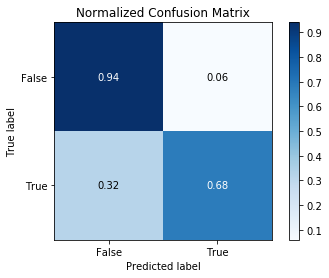

In [35]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=True )
plt.show()

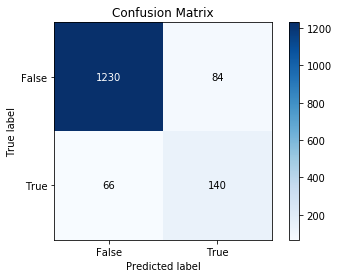

In [36]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=False )
plt.show()

/Users/aeg/miniconda/envs/untitled2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


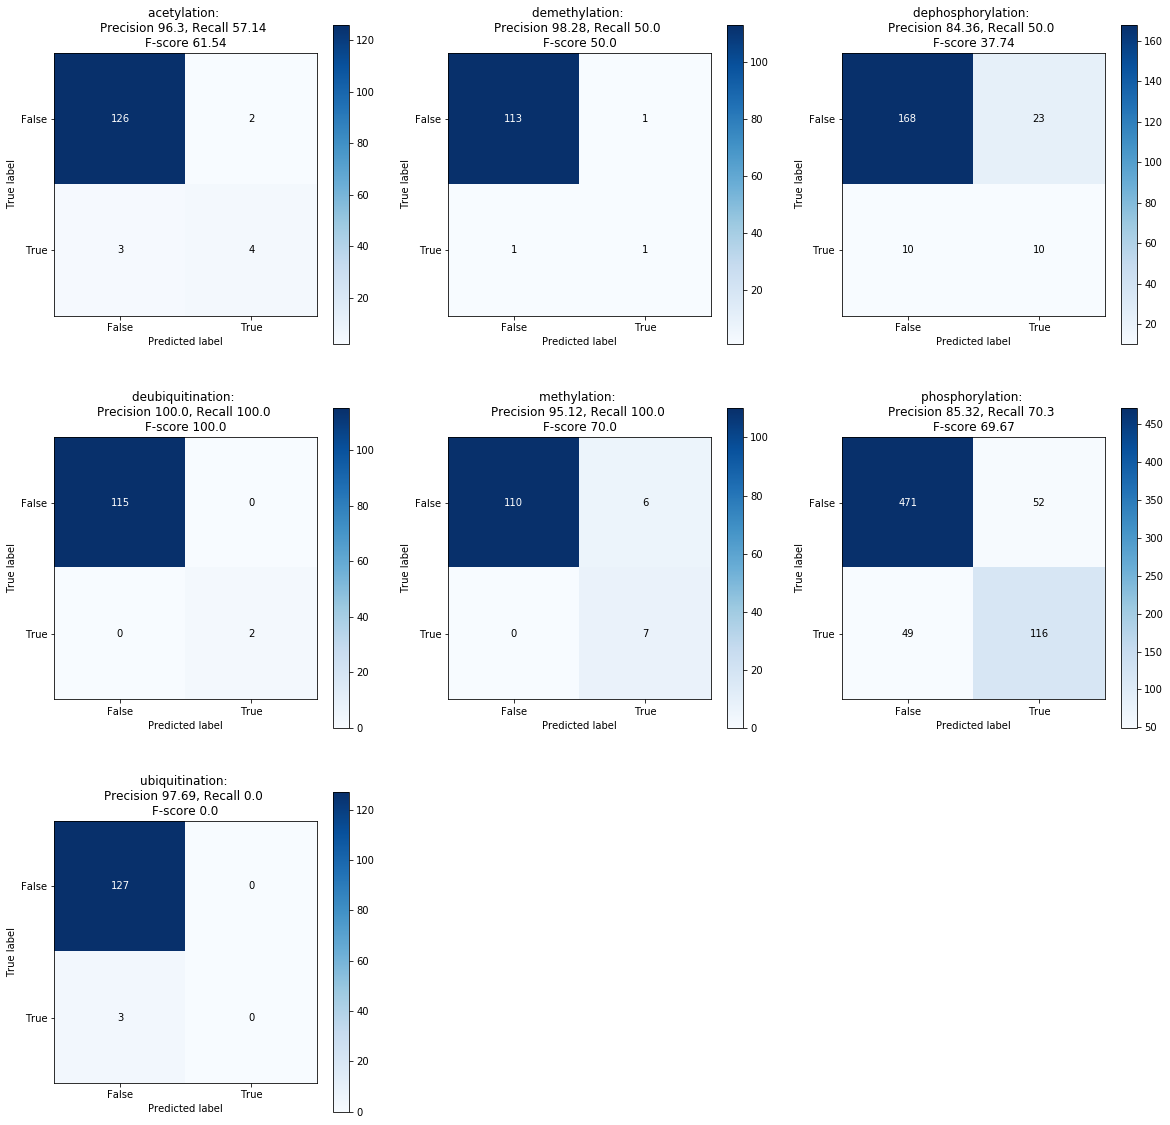

In [39]:
from sklearn.metrics import accuracy_score, accuracy_score,recall_score


interactions = df["interactionType"].unique()
interactions.sort()
#fig, ax = plt.subplots(1, len(interactions), figsize=(40,40), squeeze=False, sharey=True, sharex=True)
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(3, 3)
#ax = fig.add_axes([0,0,1,1])
i = 0
for interaction in interactions:
    r = i//3
    c= i % 3
    df_interaction_type = df.query("interactionType == '{}'".format(interaction))
    ax1 = fig.add_subplot(gs[r, c])
    


    f1 = f1_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)  
    accuracy = accuracy_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    precision= accuracy_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    recall = recall_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: \nPrecision {}, Recall {} \nF-score {}".format(interaction,  round(precision*100, 2),round(recall*100, 2), round(f1*100, 2)), ax= ax1)
    
#     ax2 = fig.add_subplot(gs[i, 1])
#     skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax2)


    i += 1
    #break

plt.savefig("confusionmatrix_.jpg", bbox_inches='tight')
plt.show()
    
    


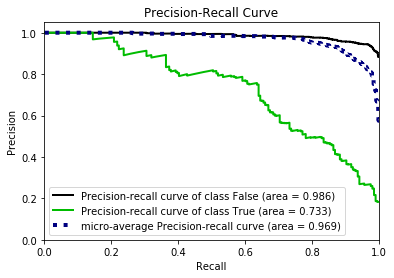

In [40]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_precision_recall(df["actual"], df[["false", "true"]])

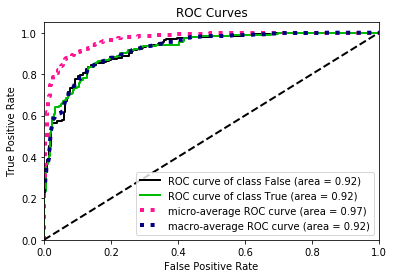

In [41]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc(df["actual"], df[["false", "true"]])

## Training / Validation epoch fit

In [42]:
import json
import pandas as pd
from pandas.io.json import json_normalize

def load_as_df (file):
    with open(file, "r") as i:
        data = json.loads(i.read())
        
    return json_normalize(data)
    

In [43]:
df_train_fit = load_as_df(train_fit_file)
df_train_fit["score"] =df_train_fit["score"]* 100
df_train_fit.sort_values(["score"], ascending=False).head(n=10)

,epoch,loss,score
27,27,3.569242,99.524941
29,29,3.766855,99.404762
28,28,4.737903,99.347955
25,25,5.101211,99.289941
30,30,5.688896,99.288256
24,24,5.397297,99.165673
26,26,4.739737,99.052133
20,20,9.263671,98.813760
21,21,8.165067,98.759598
23,23,9.329531,98.701299


In [44]:
df_val_fit = load_as_df(validation_fit_file)
df_val_fit["score"] =df_val_fit["score"]* 100


df_val_fit.sort_values(["score"], ascending=False).head(n=10)

,epoch,loss,score
9,9,27.976451,64.864865
25,25,50.566752,64.788732
26,26,52.103015,64.150943
14,14,34.013559,64.039409
8,8,27.503181,63.888889
10,10,27.960393,62.801932
19,19,43.419542,62.801932
24,24,50.308337,62.500000
13,13,36.316432,62.439024
18,18,47.145260,62.311558


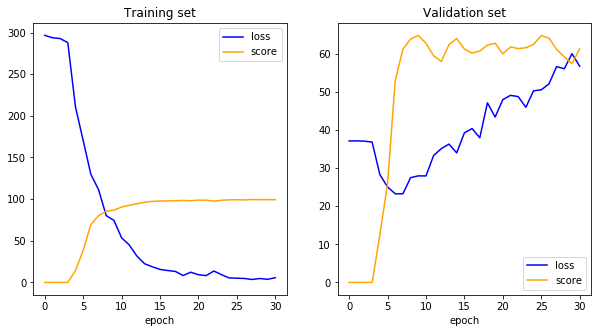

In [45]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

df_train_fit.plot.line(x="epoch", y="loss", ax = ax[0], color ="blue")
df_train_fit.plot.line(x="epoch", y="score", ax = ax[0], color="orange")
ax[0].set_title("Training set")
#ax[0].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))

df_val_fit.plot.line(x="epoch", y="loss", ax = ax[1], color="blue")
df_val_fit.plot.line(x="epoch", y="score", ax = ax[1], color ="orange")
ax[1].set_title("Validation set")
#ax[1].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))



plt.show()

### Threshold 

In [51]:
threshold = .95
df_trues = df.query("true > {}".format(threshold))
df_trues.shape

(220, 26)

In [52]:
from sklearn.metrics import f1_score, accuracy_score,precision_score

f1 = f1_score(df_trues["actual"], df_trues["predicted"])  
accuracy = accuracy_score(df_trues["actual"], df_trues["predicted"], sample_weight=None)
precision = precision_score(df_trues["actual"], df_trues["predicted"], sample_weight=None)


print("The F1 score is {} and the accuracy is {}, precision {}".format(f1, accuracy, precision))

The F1 score is 0.770949720670391 and the accuracy is 0.6272727272727273, precision 0.6272727272727273


dephosphorylation
phosphorylation
acetylation
deubiquitination
ubiquitination
demethylation
methylation


/Users/aeg/miniconda/envs/untitled2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


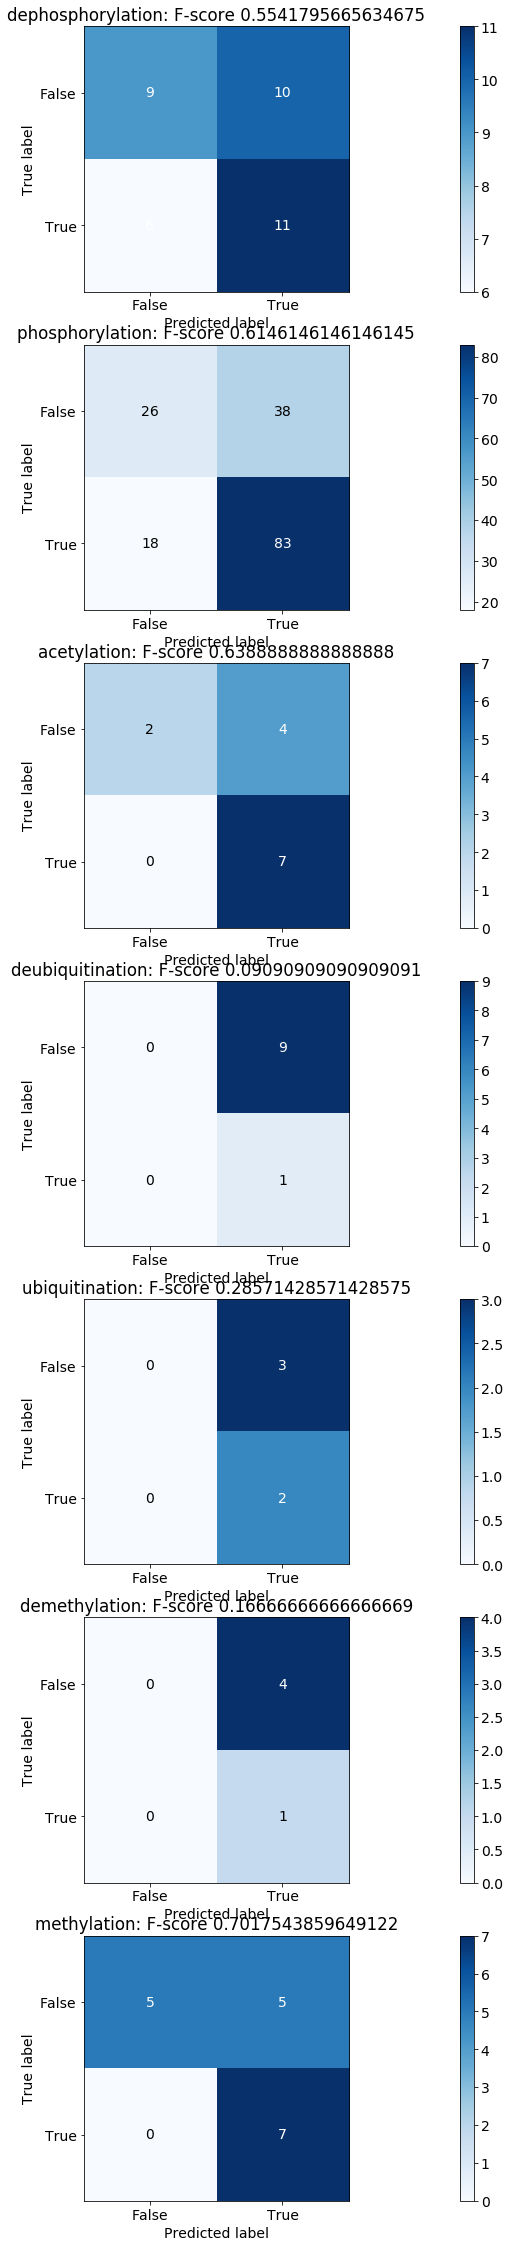

In [161]:
interactions = df_trues["interactionType"].unique()
#fig, ax = plt.subplots(1, len(interactions), figsize=(40,40), squeeze=False, sharey=True, sharex=True)
fig = plt.figure(figsize=(40,40))
gs = fig.add_gridspec(7, 1)
#ax = fig.add_axes([0,0,1,1])
i = 0
for interaction in interactions:
    print(interaction)
    df_interaction_type = df_trues.query("interactionType == '{}'".format(interaction))
    ax1 = fig.add_subplot(gs[i, 0])
    


    f1 = f1_score(df_interaction_type["actual"], df_interaction_type["predicted"], average='macro')  
    accuracy = accuracy_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax1)
    
#     ax2 = fig.add_subplot(gs[i, 1])
#     skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax2)


    i += 1
    #break

plt.savefig("confusionmatrix_threshold.jpg", bbox_inches='tight')
plt.show()
    

## Filter uniprot not in train

In [53]:
df_train = pd.read_json('train_unique_pub_v6_less_negative.json')

In [54]:
df_train['participant1Id'].values.tolist()[0:10]

['O43293-1',
 'O43293-2',
 'O60934',
 'P53235',
 'P51617',
 'Q9NWZ3',
 'P51617',
 'Q9H0H5',
 'Q9H0H5',
 'Q9H0H5']

In [55]:
train_uniprot = set(df_train['participant1Id'].values.tolist()).union(set(df_train['participant2Id'].values.tolist()))

In [56]:
df_filtered_uniprot =df[ df.apply(lambda r : r['participant2Id'] in train_uniprot and  r['participant1Id'] in train_uniprot , axis=1)]

In [57]:
df_filtered_uniprot.shape

(765, 26)

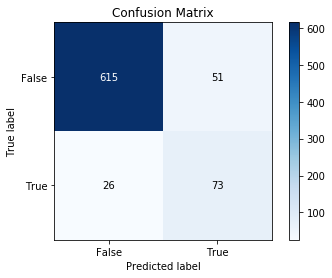

In [58]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df_filtered_uniprot["actual"], df_filtered_uniprot["predicted"], normalize=False )
plt.show()

In [59]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(df_filtered_uniprot["actual"], df_filtered_uniprot["predicted"], sample_weight=None)  
accuracy = accuracy_score(df_filtered_uniprot["actual"], df_filtered_uniprot["predicted"], sample_weight=None)
print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))




The F1 score is 0.6547085201793722 and the accuracy is 0.8993464052287582


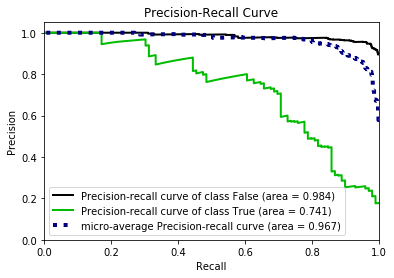

In [60]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_precision_recall(df_filtered_uniprot["actual"], df_filtered_uniprot[["false", "true"]])

#### Impact of missing uniprot

In [61]:
df_filtered_missing_uniprot =df[ df.apply(lambda r : r['participant2Id']  not in train_uniprot  or  r['participant1Id'] not in train_uniprot , axis=1)]

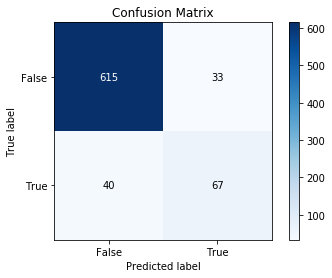

In [62]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df_filtered_missing_uniprot["actual"], df_filtered_missing_uniprot["predicted"], normalize=False )
plt.show()

In [63]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(df_filtered_missing_uniprot["actual"], df_filtered_missing_uniprot["predicted"], sample_weight=None)  
accuracy = accuracy_score(df_filtered_missing_uniprot["actual"], df_filtered_missing_uniprot["predicted"], sample_weight=None)
print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))

The F1 score is 0.6473429951690821 and the accuracy is 0.9033112582781457
